# Importing library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df= pd.read_csv("bodyfat.csv")

In [3]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [5]:
df.shape

(252, 15)

In [6]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


# Checking Missing Values

In [7]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

# Correlation

In [8]:
df.corr()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Density,1.000000,-0.987782,-0.277637,-0.594062,0.097881,-0.472966,-0.682599,-0.798955,-0.609331,-0.553091,-0.495040,-0.264890,-0.487109,-0.351648,-0.325716
BodyFat,-0.987782,1.000000,0.291458,0.612414,-0.089495,0.490592,0.702620,0.813432,0.625201,0.559608,0.508665,0.265970,0.493271,0.361387,0.346575
Age,-0.277637,0.291458,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531
Weight,-0.594062,0.612414,-0.012746,1.000000,0.308279,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
Height,0.097881,-0.089495,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
Neck,-0.472966,0.490592,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
Chest,-0.682599,0.702620,0.176450,0.894191,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
Abdomen,-0.798955,0.813432,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
Hip,-0.609331,0.625201,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090
Thigh,-0.553091,0.559608,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685


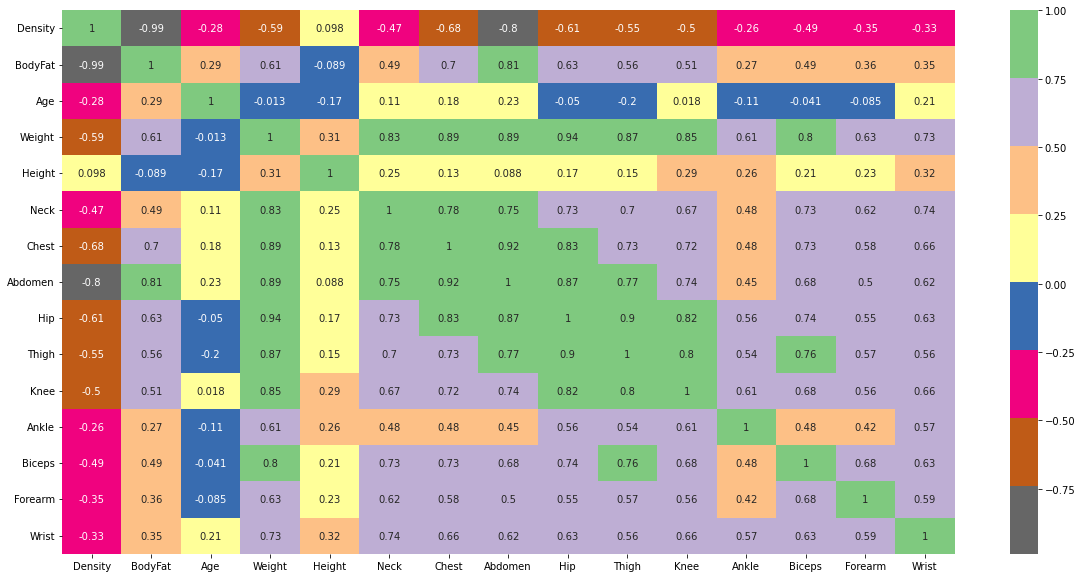

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True,cmap=plt.cm.Accent_r,annot_kws={'fontsize':10})
plt.show()

In [10]:
def correlation(data , threshold):
    corr = data.corr()['BodyFat'].sort_values(ascending=False)[1:]
    corr = (corr)
    relevant_features = corr[corr>threshold]
    return relevant_features

In [11]:
corr_features = correlation(df,0.50)

In [12]:
corr_features

Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612414
Thigh      0.559608
Knee       0.508665
Name: BodyFat, dtype: float64

For the simplicity of the web app, we will only select top 5 related variables and get them as input from user for
prediction. These variables are Abdomen, Chest, Hip, Weight and Thigh. We will only select these columns from our dataframe while developing the model.

In [13]:
x = df[["Abdomen","Chest","Hip","Weight","Thigh"]]
y = df["BodyFat"]

In [14]:
x

,Abdomen,Chest,Hip,Weight,Thigh
0,85.2,93.1,94.5,154.25,59.0
1,83.0,93.6,98.7,173.25,58.7
2,87.9,95.8,99.2,154.00,59.6
3,86.4,101.8,101.2,184.75,60.1
4,100.0,97.3,101.9,184.25,63.2
...,...,...,...,...,...
247,83.6,89.2,88.8,134.25,49.6
248,105.0,108.5,104.5,201.00,59.6
249,111.5,111.1,101.7,186.75,60.3
250,101.3,108.3,97.8,190.75,56.0


In [15]:
y

0      12.3
1       6.1
2      25.3
3      10.4
4      28.7
       ... 
247    11.0
248    33.6
249    29.3
250    26.0
251    31.9
Name: BodyFat, Length: 252, dtype: float64

# Split data 

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=22)

# Train model

In [17]:
lr=LinearRegression()
lr.fit(x_train ,y_train)

LinearRegression()

In [18]:
y_pred=lr.predict(x_test)
y_pred

array([15.55673342, 27.16156694, 11.97948527, 25.87360576, 14.93486041,
       23.48253733, 18.82984932,  9.30319119, 19.75566238, 13.52599194,
       20.63282263, 25.51000795,  8.96558065, 17.56065335, 27.40444941,
        7.98771455, 26.50215595, 14.9180513 , 17.77082738, 25.96835398,
       15.34680141, 16.19954976, 23.77337135, 40.5942448 , 19.69019275,
       16.23028574,  7.02726312, 32.9809248 , 12.0533358 , 18.44889211,
       25.69800632,  7.82234246, 22.69975134, 14.8375868 ,  5.10252605,
       21.77835263, 21.14073453, 20.72700839, 27.36821561, 23.22389671,
       18.87156476, 22.87344734, 22.45270526, 18.3755208 , 19.00431491,
       21.62598641, 14.11346059, 13.69846924, 18.80685787, 28.18069935,
        9.10867698])

In [19]:
r2_score(y_test,y_pred)

0.8274263440600723

# Pickle file

In [20]:
import pickle

In [21]:
#filename="Body_fat.pkl"
pickle.dump(lr,open('Bodyfat.pickle','wb'))

In [22]:
loaded_model=pickle.load(open('Bodyfat.pickle','rb'))